In [178]:
import pandas as pd
import seaborn as sb
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [52]:
df = pd.read_csv('cardio.csv')

In [53]:
df.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,4,48,F,156,56.0,23.0,100,60,N,N,0,0,0,0


In [54]:
df.isnull().sum()

id        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
AP_HI     0
AP_LO     0
Chol      0
Gluc      0
Smoke     0
Alco      0
Active    0
Cardio    0
dtype: int64

In [55]:
#change categorical to numeric

df['Chol']=df['Chol'].replace(['N','B','H'],[0,1,2]) 
df['Gluc']=df['Gluc'].replace(['N','B','H'],[0,1,2])
df['Gender']=df['Gender'].replace(['M','F'],[0,1])

In [56]:
df.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,0,168,62.0,22.0,110,80,0,0,0,0,1,0
1,1,55,1,156,85.0,34.9,140,90,2,0,0,0,1,1
2,2,52,1,165,64.0,23.5,130,70,2,0,0,0,0,1
3,3,48,0,169,82.0,28.7,150,100,0,0,0,0,1,1
4,4,48,1,156,56.0,23.0,100,60,0,0,0,0,0,0


In [69]:
y =df['Cardio']
x =df.drop(['Cardio'],axis=1)
x =x.drop(['id'],axis=1)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

RandomForestClassifier(max_depth=6, n_estimators=50)

train Classification report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     26412
           1       0.77      0.67      0.71     26088

    accuracy                           0.73     52500
   macro avg       0.74      0.73      0.73     52500
weighted avg       0.74      0.73      0.73     52500

train accuracy: 0.7341904761904762
test Classification report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      8609
           1       0.77      0.67      0.72      8891

    accuracy                           0.73     17500
   macro avg       0.74      0.73      0.73     17500
weighted avg       0.74      0.73      0.73     17500

test accuracy : 0.7322857142857143


<AxesSubplot:>

<AxesSubplot:>

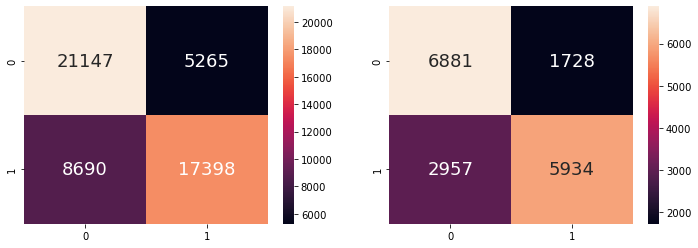

In [176]:
#n_estimators = number of trees used, 
#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=50,max_depth=6)#,bootstrap=False) 
rf_Model.fit(x_train,y_train)
y_train_pred=rf_Model.predict(x_train)
y_test_pred=rf_Model.predict(x_test)


print('train Classification report:\n',classification_report(y_train,y_train_pred))
print('train accuracy:',accuracy_score(y_train,y_train_pred))

print('test Classification report:\n',classification_report(y_test,y_test_pred))
print('test accuracy :',accuracy_score(y_test,y_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [183]:
df2= df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] #tried remove outliers slightly better results

In [184]:
y =df2['Cardio']
x =df2.drop(['Cardio'],axis=1)
x =x.drop(['id'],axis=1)


(55604, 12)

RandomForestClassifier(max_depth=8, n_estimators=80)

train Classification report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76     21458
           1       0.77      0.65      0.71     20245

    accuracy                           0.74     41703
   macro avg       0.74      0.74      0.74     41703
weighted avg       0.74      0.74      0.74     41703

train accuracy: 0.7380284392010167
test Classification report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      7199
           1       0.77      0.66      0.71      6702

    accuracy                           0.74     13901
   macro avg       0.74      0.74      0.74     13901
weighted avg       0.74      0.74      0.74     13901

test accuracy : 0.7381483346521833


<AxesSubplot:>

<AxesSubplot:>

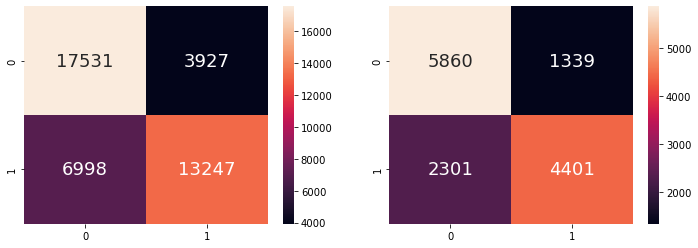

In [201]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=80,max_depth=8)#,bootstrap=False) 
rf_Model.fit(x_train,y_train)
y_train_pred=rf_Model.predict(x_train)
y_test_pred=rf_Model.predict(x_test)


print('train Classification report:\n',classification_report(y_train,y_train_pred))
print('train accuracy:',accuracy_score(y_train,y_train_pred))

print('test Classification report:\n',classification_report(y_test,y_test_pred))
print('test accuracy :',accuracy_score(y_test,y_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
